# Volume 4: Numerical Methods for IVPs
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> Strength before weakness

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [4]:
def euler(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize return solution
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    h = t[1] - t[0]

    # approximate solution using Euler's method
    for i in range(1, len(t)):
        xt = x[i-1]
        x[i] = xt + h * f(xt, t[i-1])
    
    return x
    

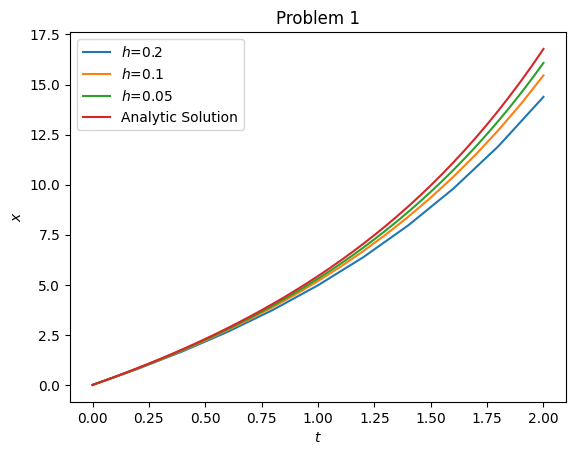

In [5]:
# initialize example differential equation
f = lambda x, t: x - 2*t + 4
x0 = [0]
h = [0.2, 0.1, 0.05]

# compute differential equation approximations
for step in h:
    t = np.arange(0, 2+step, step)
    plt.plot(t, euler(f, x0, t), label=f"$h$={step}")

# compute analytic solution
altc_t = np.arange(0, 2.05, 0.05)
solution = lambda t: -2 + 2*t + 2*np.exp(t)
plt.plot(altc_t, solution(altc_t), label="Analytic Solution")

# set plot parameters
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title("Problem 1")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [3]:
def midpoint(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize return solution
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    h = t[1] - t[0]
    h2 = h/2

    # approximate solution using midpoint method
    for i in range(1, len(t)):
        xt = x[i-1]
        step = t[i-1]
        x[i] = xt + h * f(xt + h2 * f(xt, step), step + h2)
    
    return x



def rk4(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    # initialize return solution
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    h = t[1] - t[0]
    h2 = h/2

    # approximate solution using runge-kutta method
    for i in range(len(t)-1):
        xi = x[i]
        ti = t[i]
        k1 = f(xi, ti)
        k2 = f(xi + h2*k1, ti + h2)
        k3 = f(xi + h2*k2, ti + h2)
        k4 = f(xi + h*k3, t[i+1])
        x[i+1] = xi + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return x

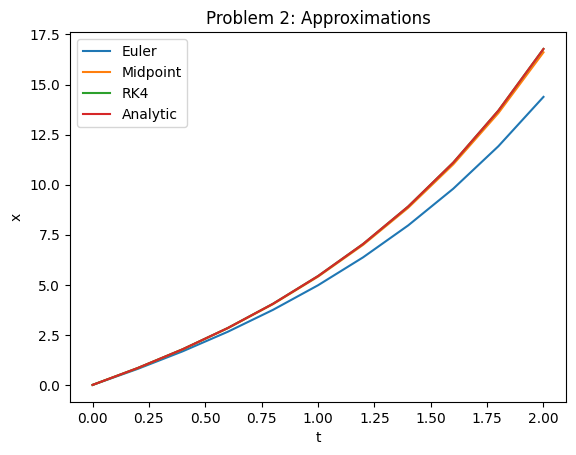

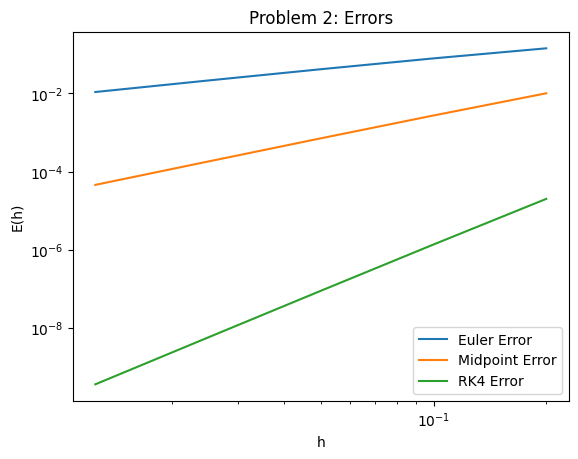

In [7]:
# initialize local variables
f = lambda x,t: x - 2*t + 4
h = 0.2
x0 = [0]
sol = lambda t: -2 + 2*t + 2*np.exp(t)

# initialize approximations
t = np.arange(0, 2+h, h)
apx_euler = euler(f, x0, t)
apx_mid = midpoint(f, x0, t)
apx_rk4 = rk4(f, x0, t)

# plot
plt.plot(t, apx_euler, label='Euler')
plt.plot(t, apx_mid, label='Midpoint')
plt.plot(t, apx_rk4, label='RK4')
plt.plot(t, sol(t), label='Analytic')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Problem 2: Approximations')
plt.legend()
plt.show()


# initialize local variables
h = [0.2, 0.1, 0.05, 0.025, 0.0125]

# compute initial errors
error_euler = abs(apx_euler[-1] - sol(2)) / (sol(2))
error_mid = abs(apx_mid[-1] - sol(2)) / (sol(2))
error_rk4 = abs(apx_rk4[-1] - sol(2)) / (sol(2))

# compute approximation of x(t) from each method
for hi in h[1:]:
    t = np.arange(0, 2+hi, hi)
    apx_euler = euler(f, x0, t)
    apx_mid = midpoint(f, x0, t)
    apx_rk4 = rk4(f, x0, t)
    
    # calculate errors
    e_err = abs(apx_euler[-1] - sol(2))/sol(2)
    m_err = abs(apx_mid[-1] - sol(2))/sol(2)
    r_err = abs(apx_rk4[-1] - sol(2))/sol(2)
    
    # construct error vectors
    error_euler = np.concatenate((error_euler, e_err))
    error_mid = np.concatenate((error_mid, m_err))
    error_rk4 = np.concatenate((error_rk4, r_err))

# set plot parameters
plt.loglog(h, error_euler, label='Euler Error')
plt.loglog(h, error_mid, label='Midpoint Error')
plt.loglog(h, error_rk4, label='RK4 Error')
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Problem 2: Errors')
plt.legend()
plt.show()
    

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

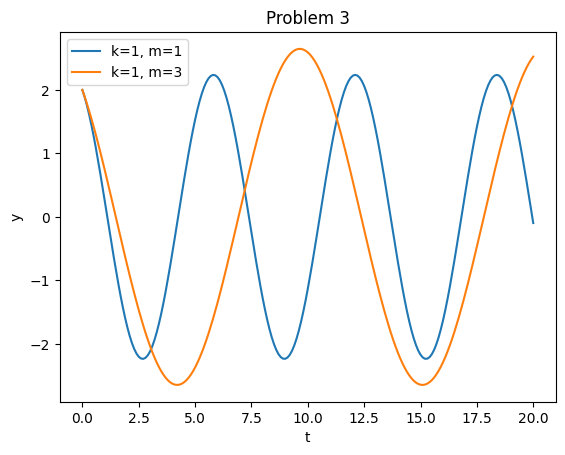

In [13]:
# initialize parameters for the simple harmonic oscillator
h = 0.1
T = 20
t = np.arange(0, T + h, h)
y0 = [2, -1]
f1 = lambda x,t: np.array([x[1], -x[0]])         #k=1, m=1
f2 = lambda x,t: np.array([x[1], -(1/3)*x[0]])   #k=1, m=3

# approximate ode
y1 = rk4(f1, y0, t)
y2 = rk4(f2, y0, t)

# plot results
plt.plot(t, y1[:, 0], label="k=1, m=1")
plt.plot(t, y2[:, 0], label="k=1, m=3")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 3")
plt.legend()
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

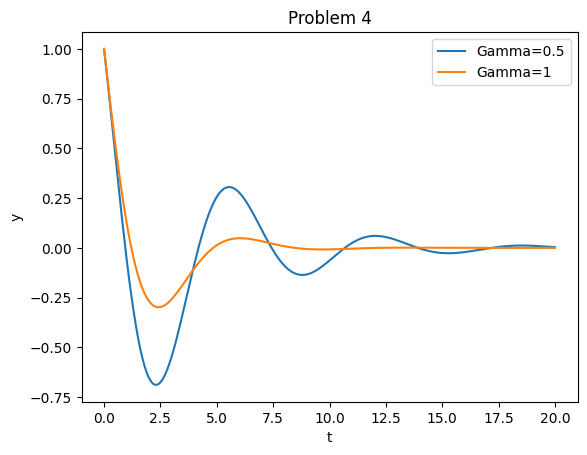

In [14]:
# initialize parameters for the damped free harmonic oscillator
h = 0.1
T = 20
t = np.arange(0, T + h, h)
y0 = [1, -1]
f1 = lambda x,t: np.array([ x[1], -x[0]-0.5*x[1]  ])  #Gamma=0.5
f2 = lambda x,t: np.array([ x[1], -x[0]-x[1]  ])      #Gamma=1

# approximate ode
y1 = rk4(f1, y0, t)
y2 = rk4(f2, y0, t)

# plot results
plt.plot(t, y1[:, 0], label="Gamma=0.5")
plt.plot(t, y2[:, 0], label="Gamma=1")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 4")
plt.legend()
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 

\begin{align*}
2y'' + \gamma y' + 2y &= 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
y(0) &= 2,\\
y'(0) &= -1
\end{align*}

For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

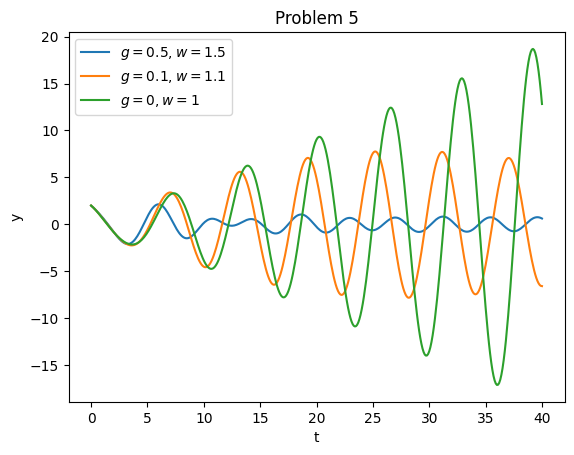

In [5]:
# initialize parameters for the damped free harmonic oscillator
h = 0.1
T = 40
t = np.arange(0, T + h, h)
y0 = [2, -1]

cos = lambda w, t: np.cos(w*t)
f1 = lambda x, t: np.array([x[1], (cos(1.5, t) - x[0] - 0.5*x[1]/2)]) # g=0.5, w=1.5
f2 = lambda x, t: np.array([x[1], (cos(1.1, t) - x[0] - 0.1*x[1]/2)]) # g=0.1, w=1.1
f3 = lambda x, t: np.array([x[1], (cos(1, t) - x[0])])              # g=0, w=1

# approximate ode
y1 = rk4(f1, y0, t)
y2 = rk4(f2, y0, t)
y3 = rk4(f3, y0, t)

# plot results
plt.plot(t, y1[:, 0], label="$g=0.5, w=1.5$")
plt.plot(t, y2[:, 0], label="$g=0.1, w=1.1$")
plt.plot(t, y3[:, 0], label="$g=0, w=1$")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 5")
plt.legend()
plt.show()